## Validating the feature filter component

In [1]:
import torch
import numpy as np

from datasets.dataset import transform_dataset, kfold_dataset
from R2Ntab import train as train, R2Ntab
import matplotlib.pyplot as plt

In [2]:
# Read datasets
dummy_features = 30
name = 'adult'
X, Y, X_headers, Y_headers = transform_dataset(name, method='onehot-compare', negations=False, labels='binary', dummy_features=dummy_features)
datasets = kfold_dataset(X, Y, shuffle=1)
X_train, X_test, Y_train, Y_test = datasets[0]
train_set = torch.utils.data.TensorDataset(torch.Tensor(X_train.to_numpy()), torch.Tensor(Y_train))
test_set = torch.utils.data.TensorDataset(torch.Tensor(X_test.to_numpy()), torch.Tensor(Y_test))

In [5]:
# Train R2N-tab
# Default learning rate (1e-2), and_lam (1e-2), and and_lam (1e-5) usually work the best. A large epochs number is necessary for a sparse rule set i.e 10000 epochs.
#index = X_train.shape[1]-dummy_features
dummy_index = next(i for i, header in enumerate(X_headers) if 'dummy' in header)
net = R2Ntab(train_set[:][0].size(1), 50, 1)
dummies = train(net, train_set, test_set=test_set, device='cpu', lr_cancel=1e-2, lr_rules=1e-2, epochs=1000, 
          batch_size=400, and_lam=1e-2, cancel_lam=1, or_lam=1e-5, num_alter=500, dummy_index=dummy_index)

Epoch: 100%|██████████| 1000/1000 [27:37<00:00,  1.66s/it, rules cancelled=208, loss=0.811, epoch accu=0.814, test accu=0.826, num rules=6, sparsity=0.948]


In [6]:
rules = net.get_rules(X_headers)
print(rules)

[['NOT fnlwgt<=219893.69999999998', 'NOT education_num<=10.0', 'NOT education_num<=13.0', 'relationship==Not-in-family', 'race==Amer-Indian-Eskimo'], ['NOT age<=26.0', 'NOT education==Assoc-acdm', 'NOT education_num<=9.0', 'NOT education_num<=10.0', 'NOT marital-status==Divorced', 'NOT marital-status==Never-married', 'NOT marital-status==Separated', 'NOT occupation==Adm-clerical', 'NOT occupation==Craft-repair', 'NOT occupation==Farming-fishing', 'NOT occupation==Handlers-cleaners', 'NOT occupation==Machine-op-inspct', 'NOT occupation==Other-service', 'NOT occupation==Transport-moving', 'NOT relationship==Not-in-family', 'NOT relationship==Other-relative', 'NOT relationship==Own-child', 'NOT relationship==Unmarried', 'NOT race==Other', 'NOT hours-per-week<=25.0', 'NOT native-country==Columbia', 'NOT native-country==Dominican-Republic', 'NOT native-country==Jamaica', 'NOT native-country==Poland', 'NOT native-country==South'], ['NOT age<=30.0', 'NOT age<=37.0', 'NOT education_num<=13.0',

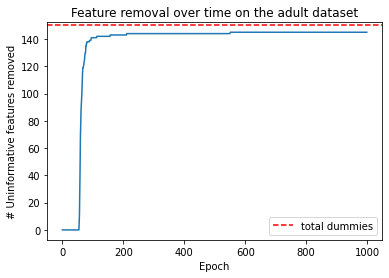

In [21]:
n_dummies = X_train.shape[1]-dummy_index
line1 = plt.plot(dummies)
line2 = plt.axhline(y=n_dummies, color='r', linestyle='dashed', label='total dummies')    
plt.title(f"Feature removal over time on the {name} dataset")
plt.ylabel("# Uninformative features removed")
plt.xlabel("Epoch")
plt.legend(handles=[line2])
plt.savefig('dummyfeatures.png')
plt.show()